/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

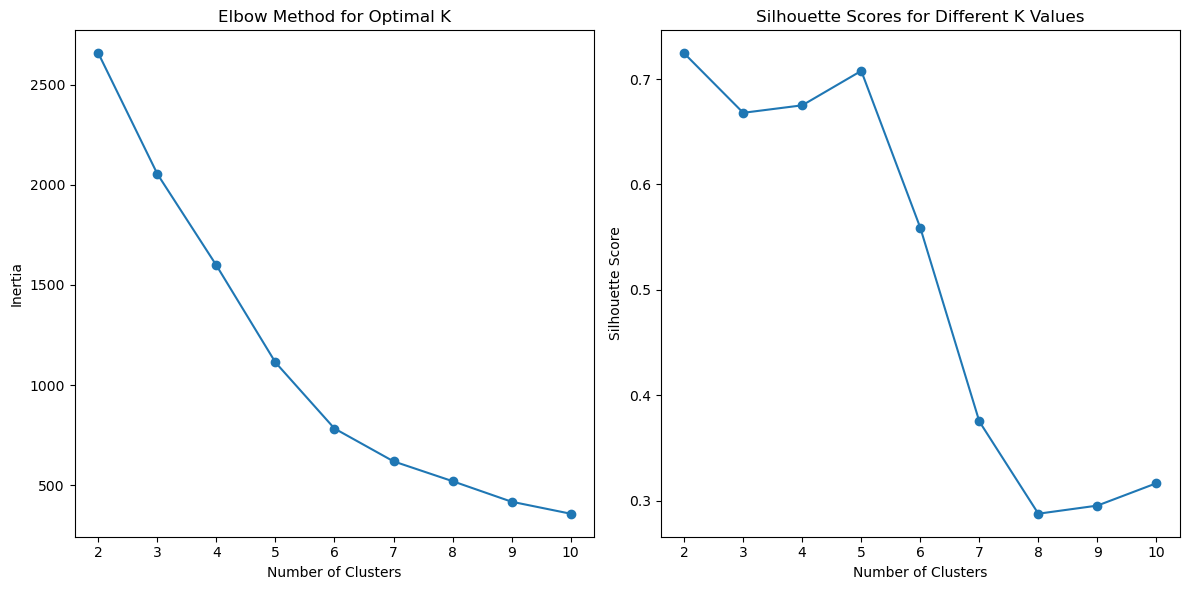

/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


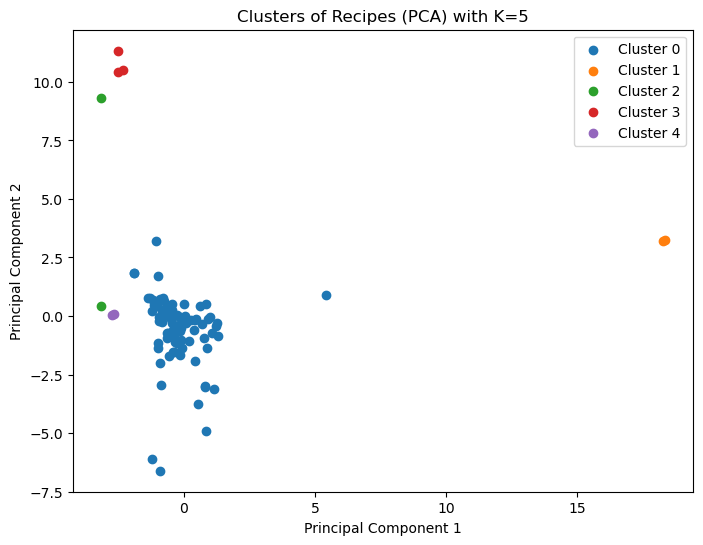

Recipes in each cluster:
 Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import ast  # For converting string representation of lists to actual lists

file_path = '/Users/ibnatchoudkhuri/Library/Mobile Documents/com~apple~CloudDocs/Downloads/updated_cleaned_recipe_dataset.csv'  # Replace this with your actual file path
# Load the dataset
data = pd.read_csv(file_path)

data['Ingredient'] = data['Ingredient'].apply(ast.literal_eval)  # Convert Ingredient lists from string to list
ingredients_encoded = data['Ingredient'].str.get_dummies(sep=', ')  # Note: Adjust separator if needed
dietary_encoded = data['Dietary Preference'].str.get_dummies()
health_goals_encoded = data['Health Goals'].str.get_dummies()

# Combine all features: Nutritional Information, Ingredients, Dietary Restrictions, and Health Goals
features_combined = pd.concat([data[['Calories', 'Carbohydrates', 'Proteins']], ingredients_encoded, dietary_encoded, health_goals_encoded], axis=1)

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_combined)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Adjust n_components as needed based on variance analysis
features_pca = pca.fit_transform(features_scaled)

# Determine the optimal number of clusters using the Elbow Method and silhouette analysis
inertia = []
silhouette_scores = []
max_clusters = 10  # Adjust based on dataset size and computational constraints
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_pca, labels))

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.tight_layout()
plt.show()

# Choosing 5 clusters based on analysis
optimal_k = 5  # or 6 based on further analysis and preference
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(features_pca)

# Visualize the clusters (optional, 2D PCA plot for example)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(features_pca[data['Cluster'] == cluster, 0], features_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Clusters of Recipes (PCA) with K={optimal_k}')
plt.legend()
plt.show()

# Additional analysis and cluster interpretation steps as needed

# Group the recipes by cluster and list them
clustered_recipes = data.groupby('Cluster')['Recipe'].apply(list).reset_index()

# Convert the grouped data into a more readable table format
clustered_recipes_table = pd.DataFrame({
    'Cluster': clustered_recipes['Cluster'],
    'Recipes': clustered_recipes['Recipe'].apply(lambda x: ', '.join(x))
})

# Display the table
print("Recipes in each cluster:")
print(clustered_recipes_table.to_string(index=False))
